# Homework 3: Reproducibility in Climate Studies

* **Statistics 159/259, Spring 2022**
* **Due 03/23/2023, 23:59PM PT**
* Prof. F. Pérez and GSI F. Sapienza, Department of Statistics, UC Berkeley.
* This assignment is worth a maximum of **50 points**.
* Assignment type: **group homework assignment** (Check on Ed Discussion about group's assignments).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_516/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


You can test the output of your result by

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

### Question 6 [10 points]

Reproduce one of the images in Figure 3. 

In [3]:
ds= xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

# Reproducing Graph A

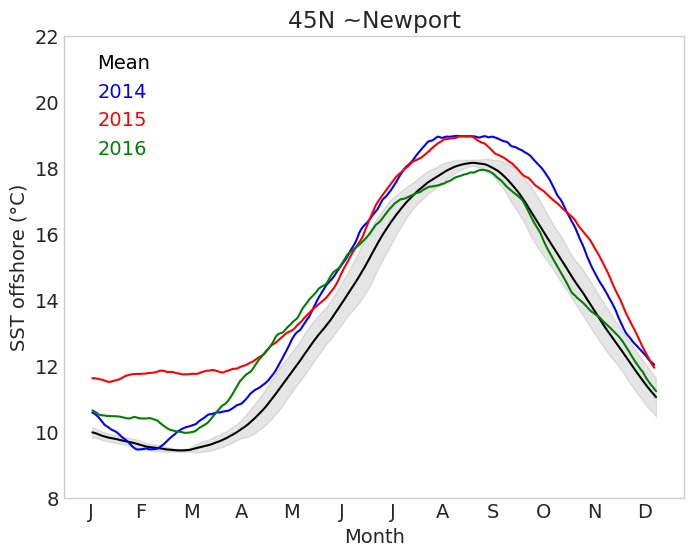

In [4]:
#Data Set up
copy = ds
copy.coords['day'] = copy.time.dt.dayofyear
copy = copy.assign({'cel_sst': ds.analysed_sst - 273.15})
latitude, longitude = 45, -127.3163
copy = copy.sel(lat= latitude, lon = longitude, method = 'nearest') 

#Values that are ±1 SD around the mean during 2002–2013 that make up the grey area
average_day = copy.groupby(copy.day).mean()
average_day.cel_sst.rolling(day = 30, center = True).mean().plot(x = 'day', color = 'black', label = 'Mean')

#Values during 2014 that make up the blue line
copy.sel(time='2014').cel_sst.rolling(time=30, center=True).mean().plot(x='day', color='blue', label='2014')

#Values during 2015 that mkae the red line
copy.sel(time = "2015").cel_sst.rolling(time = 30, center = True).mean().plot(x = 'day', color = 'red' , label='2015');

#Values during 2016 that make the green line
copy.sel(time = "2016").cel_sst.rolling(time = 30, center = True).mean().plot(x = 'day', color = 'green', label='2016');


copy_mean = average_day.cel_sst.rolling(day = 30, center = True).mean( )
copy_std = average_day.cel_sst.rolling(day = 30, center = True).std()
days = average_day.assign({'cel_sst_plus_1sd': copy_mean + copy_std, 'cel_sst_minus_1sd': copy_mean - copy_std})

#Plotting
plt.fill_between(days.day, days.cel_sst_minus_1sd, days.cel_sst_plus_1sd, alpha = 0.2, color = 'tab:gray');
#plt.fill_between(mean_values.dayofyear, upper_values, lower_values, color='tab: darkgrey')
plt.title('45N ~Newport')
plt.ylabel('SST offshore (°C)')
plt.xticks(np.arange(15, 346, 30), ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']) 
plt.xlabel('Month')
plt.ylim(8, 22)
plt.grid(b=None)
plt.legend(loc='upper left', labelcolor='linecolor', frameon=False, handlelength=0)
plt.savefig('outputs/climate-Q06.png')